In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import porespy as ps
from porespy.tools import ps_ball


Format: ASCII

Voxel labels: 0=outside the duct; 1=inside the duct (but outside the sphere); 2=sphere

Voxel dimensions: 100x100x200

Duct location (x,y,z): [20,80],[20,80],[20,180]

Duct location voxels: 21-80,21-80,21-180

Sphere center (x,y,z): [50,50,100]

Sphere radius: R=15

In [11]:
Img=np.zeros([100,100,200],dtype=np.uint8)
Img[20:80,20:80,20:180]=255

sphere = ps_ball(radius=15)
sphere=sphere.astype(np.uint8)
sphere[sphere>0]=125
sphere[sphere==0]=255

Img_final = ps.generators.insert_shape(Img, element=sphere, center=[50, 50, 100])

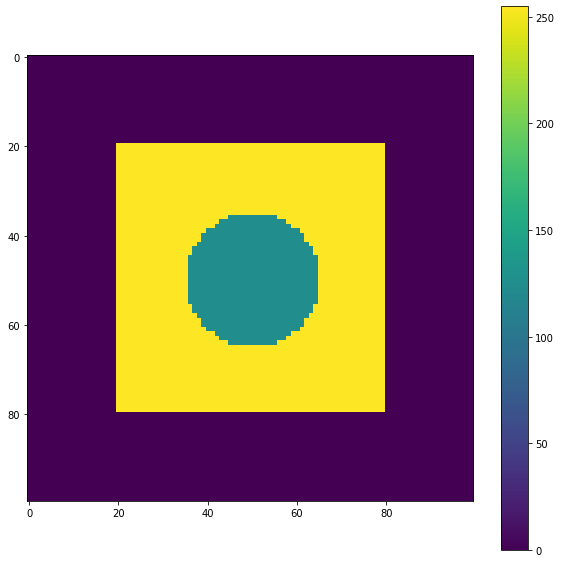

In [46]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(Img_final[:,:,100])
plt.colorbar()
plt.show()

In [55]:
with open('DuctSphere100_100_200.txt','w') as f:
    for layer in Img_final:
        for col in layer:
            for row in col:
                f.write("%d " % row)
            f.write("\n")
        f.write("\n")

In [54]:
from PIL import Image
for i in range(Img.shape[2]):
    im = Image.fromarray(np.uint8(cm.gist_earth(Img_final[:,:,i])*255))
    im.save('.\img\img'+str(i)+'.tif')

In [48]:
Img.shape

(100, 100, 200)